# Assessed Exercise - Topic 1
### Option 1: Arrhenius Equation

In [1]:
#import appropriate modules and initialise constants
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stats

from decimal import Decimal
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

R = 8.314 #gas constant, J K-1 mol-1

In [2]:
#read in your data files
a1 = pd.read_csv("Ex_Arrh1.csv")
a2 = pd.read_csv("Ex_Arrh2.csv")

## Part a
-------------------------------------------------------------------
The Arrhenius equation relates reaction rates with temperature according to $k = A exp(\frac{-Ea}{RT})$ <P/>
hence   $ln k = ln A - \frac{Ea}{RT}$ <p/>
Use a simple linear regression to determine the slope of your plot, where slope = $-\frac{Ea}{R}$, and the activation energy, $Ea$, for this data in units of $kJ mol ^{-1}$. Determine whether the full data set described well by a linear relationship.

In [3]:
#transform data and add to dataframe in new columns
a1["1/T"] = 1/a1["T [K]"]
a1["log k"] = np.log(a1["k [s-1]"])

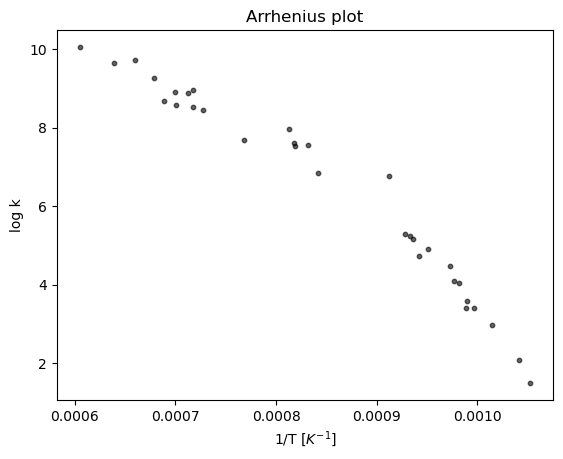

In [4]:
#generate arrhenius plot 
fig, ax = plt.subplots()

ax.scatter(x = a1["1/T"], y = a1["log k"], s = 10, alpha = 0.6, color = "black")

ax.set(title = "Arrhenius plot", xlabel = "1/T [$K^{-1}$]", ylabel = "log k"); #semi colon gets rid of output

In [5]:
# create an instance of the model
model = linear_model.LinearRegression(fit_intercept=True)

# Create a single column DataFrame for training data x
X = a1[["1/T"]]

# Extract y data series
y = a1["log k"]

# Pass the data to the `fit` method
model.fit(X,y)

LinearRegression()

In [6]:
#add the predicted values to the dataset
a1["pred_y"] = model.predict(X)
a1.head()

,T [K],k [s-1],1/T,log k,pred_y
0,950,4.43,0.001053,1.488400,2.750049
1,960,8.07,0.001042,2.088153,2.946094
2,986,19.60,0.001014,2.975530,3.437203
3,1003,29.80,0.000997,3.394508,3.744547
4,1010,35.90,0.000990,3.580737,3.868093


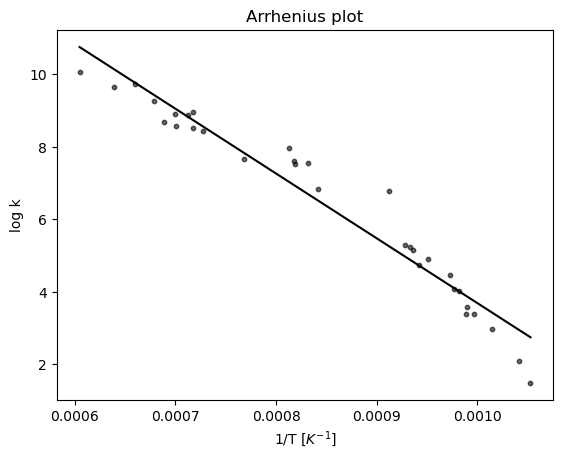

In [7]:
#now plot regression onto Arrhenius plot
fig, ax = plt.subplots()

ax.scatter(x = a1["1/T"], y = a1["log k"], s = 10, alpha = 0.6, color = "black")
ax.plot(a1["1/T"], a1["pred_y"], color = "black")

ax.set(title = "Arrhenius plot", xlabel = "1/T [$K^{-1}$]", ylabel = "log k"); #semi colon gets rid of output

In [8]:
#calculate the gradient and hence activation energy
gradient = model.coef_[0]
intercept = model.intercept_

Ea = (- gradient * R)/1000
A = np.exp(intercept)

print(f"Activation energy is: {Ea :.2f} kJ mol-1")
print(f"Arrhenius constant is: {Decimal(A) :.2E}")

Activation energy is: 148.65 kJ mol-1
Arrhenius constant is: 2.33E+9


###### Determine $Ea$ for a subset of the data:

In [9]:
#Remove data above 1100 K
a1_filter = a1[a1["T [K]"] <= 1100]

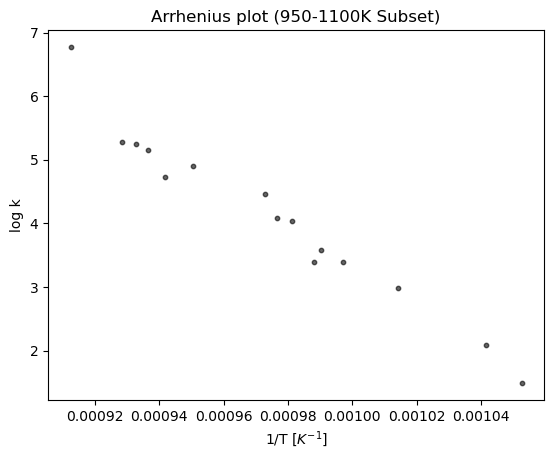

In [10]:
#generate arrhenius plot 
fig, ax = plt.subplots()

ax.scatter(x = a1_filter["1/T"], y = a1_filter["log k"], s = 10, alpha = 0.6, color = "black")

ax.set(title = "Arrhenius plot (950-1100K Subset)", xlabel = "1/T [$K^{-1}$]", ylabel = "log k"); #semi colon gets rid of output

In [11]:
# create an instance of the model
model_ = linear_model.LinearRegression(fit_intercept=True)

# Create a single column DataFrame for training data x
X_ = a1_filter[["1/T"]]

# Extract y data series
y_ = a1_filter["log k"]

# Pass the data to the `fit` method
model_.fit(X_,y_)

LinearRegression()

In [12]:
#add the predicted values to the dataset
a1_filter["pred_y_filter"] = model_.predict(X_)

/tmp/ipykernel_182/1127852197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1_filter["pred_y_filter"] = model_.predict(X_)


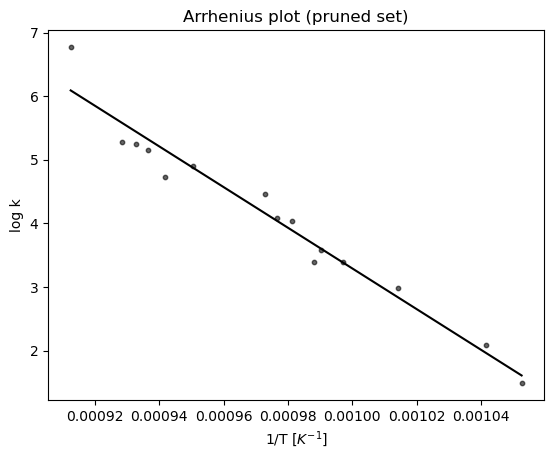

In [13]:
#now plot regression
#generate arrhenius plot 
fig, ax = plt.subplots()

ax.scatter(x = a1_filter["1/T"], y = a1_filter["log k"], s = 10, alpha = 0.6, color = "black")
ax.plot(a1_filter["1/T"], a1_filter["pred_y_filter"], color = "black")

ax.set(title = "Arrhenius plot (pruned set)", xlabel = "1/T [$K^{-1}$]", ylabel = "log k"); #semi colon gets rid of output

In [14]:
#calculate the gradient and hence activation energy
gradient_ = model_.coef_[0]
intercept_ = model_.intercept_

Ea_ = (- gradient_ * R)/1000
A_ = np.exp(intercept_)

print(f"Activation energy is: {Ea_ :.2f} kJ mol-1")
print(f"Arrhenius constant is: {Decimal(A_) :.2E}")

Activation energy is: 265.74 kJ mol-1
Arrhenius constant is: 2.04E+15


#### Compare the models - 
$rmse$ and $r^2$ / fit vs residual / cross-validation

In [15]:
#calculate the root mean squared error and R-squared value
#an underscore after the variable name indicates its for the subset of the data
rmse = mean_squared_error(y, a1["pred_y"], squared = False)
rmse_ = mean_squared_error(y_, a1_filter["pred_y_filter"], squared = False)

r2 = r2_score(y, a1["pred_y"])
r2_ = r2_score(y_, a1_filter["pred_y_filter"])

print(f"For the entire dataset, rmse is {rmse: .2f} and r2 score is {r2: .2f}")
print(f"For the subset, rmse is {rmse_: .2f} and r2 score is {r2_: .2f}")

For the entire dataset, rmse is  0.55 and r2 score is  0.95
For the subset, rmse is  0.26 and r2 score is  0.96


In [16]:
#cross validate the model
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(model, X, y, cv = cv, scoring = "r2")
scores_ = cross_val_score(model_, X_, y_, cv = cv, scoring = "r2")

print(scores.mean(), scores.std())
print(scores_.mean(), scores_.std())

0.848820000152821 0.1407284831808543
0.8794980100538373 0.11987513693682494


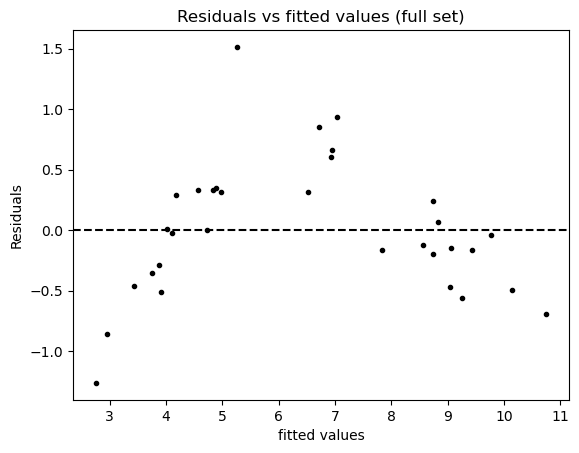

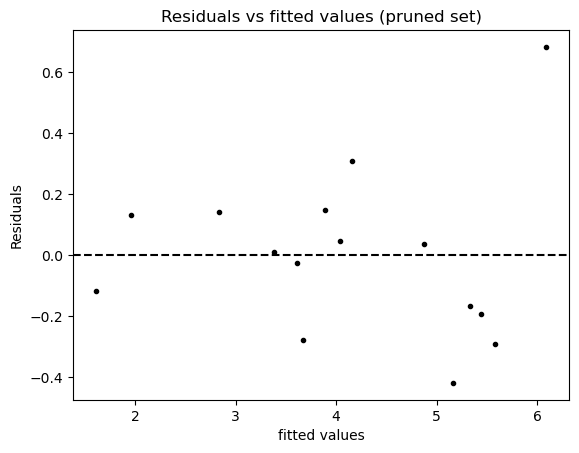

In [17]:
#plot residuals against fit
fig, ax = plt.subplots()
ax.plot(a1["pred_y"], a1["log k"] - a1["pred_y"], '.', color = "black")

ax.axhline(0, color = "k", linestyle = 'dashed') 
ax.set(title = "Residuals vs fitted values (full set)", ylabel = "Residuals", xlabel = "fitted values")

#again but for the subset
fig, ax2 = plt.subplots()
ax2.plot(a1_filter["pred_y_filter"], a1_filter["log k"] - a1_filter["pred_y_filter"], ".", color = "black")

ax2.axhline(0, color = "k", linestyle = 'dashed') 
ax2.set(title = "Residuals vs fitted values (pruned set)", ylabel = "Residuals", xlabel = "fitted values");

## Part b 
-------------------------
Use statistical measures of location (mean) and variability (standard deviation), along with suitable visualisation plots, to compare these results to the activation energies you have determined in part a. <p/>
Clearly justify why you have chosen the descriptive statistics used and critically assess the models fitted in part a, comparing them to the “ideal” Arrhenius equation suggested by the collected dataset. <p/>**Note: see justifications and analysis in the report**

In [19]:
#make Ea series a variable for ease
Ea_data = a2["Ea [kJ/mol]"]

#A quick look at energy values from each dataset
compare = pd.DataFrame(data={"Dataset":['Experimental', 'Pruned', 'Published'], 'Ea / $kJ mol^{-1}$':[Ea, Ea_, Ea_data.mean()], '% Difference to published':[(Ea - Ea_data.mean())*100 /Ea_data.mean() , (Ea_ - Ea_data.mean())*100/Ea_data.mean(), 0]})
compare

,Dataset,Ea / $kJ mol^{-1}$,% Difference to published
0,Experimental,148.649253,-44.846368
1,Pruned,265.739653,-1.402080
2,Published,269.518519,0.000000


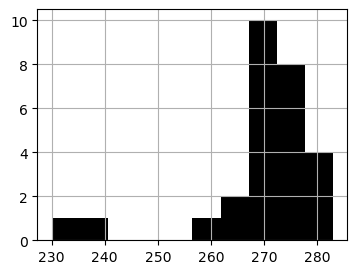

In [20]:
#A quick look at the distribution
a2['Ea [kJ/mol]'].hist(color = "black", figsize = (4,3));

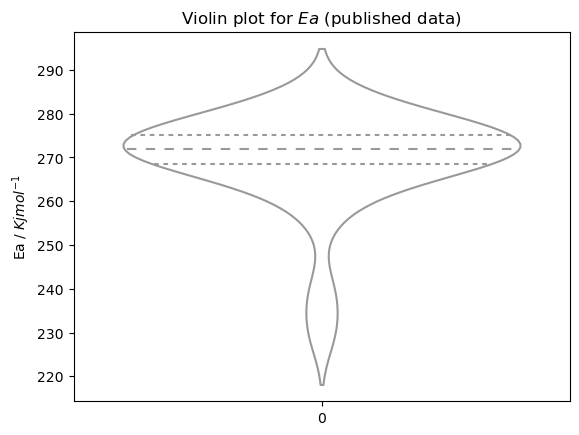

In [21]:
ax = sns.violinplot(Ea_data, inner = "quartile", color = "white")
ax.set(title = "Violin plot for $Ea$ (published data)",
      ylabel = "Ea / $Kj mol^{-1}$");

In [22]:
#calculate the mean, median and std
Ea_data.describe()

count     27.000000
mean     269.518519
std       11.470264
min      230.000000
25%      268.500000
50%      272.000000
75%      275.000000
max      283.000000
Name: Ea [kJ/mol], dtype: float64

In [30]:
print(f'the difference between the mean & median is {Ea_data.mean() - Ea_data.median()}')

the difference between the mean & median is -2.4814814814814667


In [23]:
#any outliers?
Filter = Ea_data.quantile(0.25) - (1.5*(Ea_data.quantile(0.75)-Ea_data.quantile(0.25)))
a2_outliers = a2[a2['Ea [kJ/mol]']<=Filter]
a2_outliers

,Reference,Temp [K],A,Ea [kJ/mol],Order
7,1978TSA599,1000 - 1200,1.260000e+14,258,1
16,1971BRA/FRE72,1060 - 1300,7.940000e+11,230,1
19,1963KEN/PRI161-163,749 - 791,3.980000e+11,239,1


In [24]:
#calculate the variance
print(f"{stats.variance(Ea_data) :.2f}")

131.57


In [26]:
#estimates the uncertainty of a statistic
results=[]
for nrepeat in range(20):     # changing the number of repeats will be interesting.
    sample=resample(Ea_data)
    results.append(sample.mean())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {Ea_data.mean()}')
print(f'bootstrapped: {results.mean()}')
print(f'bias: {Ea_data.mean() - results.mean()}')
print(f'std: {results.std()}')

Bootstrap Statistics:
original: 269.51851851851853
bootstrapped: 269.23148148148147
bias: 0.2870370370370665
std: 1.860443034688874


-----------------------------------------